## FINAL DEMO

In [43]:
import pandas as pd
from functions import *

df_final_demo = pd.read_csv("df_final_demo.csv")

df_final_demo.head()
df_final_demo.dropna(inplace=True)

mapGenre = {'X' : 'U'}
df_final_demo["gendr"] = replace_values_df(df_final_demo["gendr"], mapGenre)

## WEB DATA

In [44]:
df_web_data1 = pd.read_csv("df_final_web_data_pt_1.csv")
df_web_data2 = pd.read_csv("df_final_web_data_pt_2.csv")

df_web_data_concat = pd.concat([df_web_data1, df_web_data2], axis=0, join='inner')

In [45]:
# Convert type object into datetime 

df_web_data_concat['date_time'] = convert_to_dateTime(df_web_data_concat['date_time'])

df_web_data_concat.dtypes

client_id                int64
visitor_id              object
visit_id                object
process_step            object
date_time       datetime64[ns]
dtype: object

In [46]:
# I turn 'step' into a discrete numeric df

map_values = {'start' : 0, 'step_1' : 1, 'step_2' : 2, 'step_3' : 3, 'confirm' : 4}

df_web_data_concat["process_step"] = replace_values_df(df_web_data_concat["process_step"], map_values)

## FINAL EXP

In [47]:
df_final_exp = pd.read_csv("df_final_experiment_clients.csv")
df_final_exp.rename(columns={"Variation" : "variation"}, inplace=True)

In [48]:
df_final_exp = drop_na_df(df_final_exp, "variation")

In [49]:
map_values2 = {'Control': 0, 'Test': 1}

df_final_exp["variation"] = replace_values_df(df_final_exp["variation"], map_values2)

## MERGE

In [50]:
df_temp1 = pd.merge(df_final_demo, df_web_data_concat, on='client_id', how='inner')

df_all = pd.merge(df_temp1, df_final_exp, on='client_id', how='inner')

In [51]:
df_all = df_all.drop("clnt_tenure_yr", axis=1)      # We don´t need this column because is derivative from clnt_tenure_mnth

In [52]:
df_all_no_duplicates = df_all.copy()
df_all_no_duplicates.drop_duplicates(subset="client_id", inplace=True)

# El datafram pero sin los duplicados

## QUITAMOS OUTLIERS DEL DF_ALL Y DEL QUE NO TIENE DUPLICADOS

In [53]:
df_all = outlier_slayer(df_all)

df_all_no_duplicates = outlier_slayer(df_all_no_duplicates)

# VER SI SON JOVENES O NO

In [54]:
df_all_no_duplicates["clnt_age"].describe()

count    34931.000000
mean        46.057213
std         15.322921
min         17.000000
25%         32.500000
50%         46.000000
75%         58.500000
max         96.000000
Name: clnt_age, dtype: float64

In [55]:
df_all["clnt_age"].mode()

0    59.5
Name: clnt_age, dtype: float64

<Axes: >

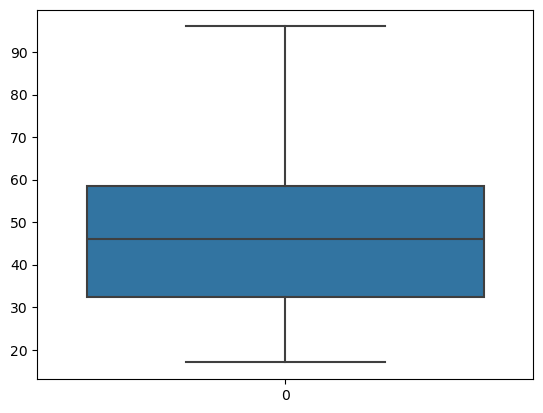

In [56]:
import seaborn as sns

sns.boxplot(data = df_all_no_duplicates['clnt_age'])

In [57]:
Q1 = df_all_no_duplicates['clnt_age'].quantile(0.25)
Q3 = df_all_no_duplicates['clnt_age'].quantile(0.75)
IQR = Q3 - Q1


inf_lim = Q1 - 1.5*IQR
sup_lim = Q3 + 1.5*IQR

inf_lim, sup_lim

(-6.5, 97.5)

In [58]:
# age_outliers = df_all_no_duplicates['clnt_age'][(df_all_no_duplicates['clnt_age'] < inf_lim) | (df_all_no_duplicates['clnt_age'] > sup_lim) ]

# age_outliers         # THERE ARE NO OUTLIERS ON Client Age column

# VER SI SON NUEVOS O ANTIGUOS

In [59]:
df_all_no_duplicates["clnt_tenure_mnth"].describe()

count    34931.000000
mean       137.713521
std         68.669962
min         33.000000
25%         79.000000
50%        123.000000
75%        181.000000
max        357.000000
Name: clnt_tenure_mnth, dtype: float64

In [60]:
df_all["clnt_tenure_mnth"].mode()

0    58.0
Name: clnt_tenure_mnth, dtype: float64

<Axes: >

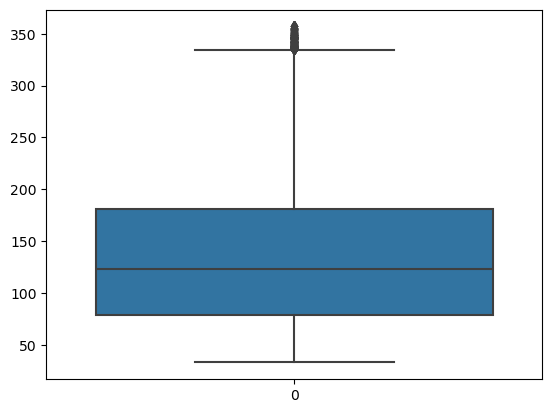

In [61]:
sns.boxplot(data = df_all_no_duplicates['clnt_tenure_mnth'])            # Seguimos teniendo outliers pero dar una segunda pasada es contraproducente en principio.

In [62]:
Q1 = df_all_no_duplicates['clnt_tenure_mnth'].quantile(0.25)
Q3 = df_all_no_duplicates['clnt_tenure_mnth'].quantile(0.75)
IQR = Q3 - Q1


inf_lim = Q1 - 1.5*IQR
sup_lim = Q3 + 1.5*IQR

inf_lim, sup_lim

(-74.0, 334.0)

## Día 3

In [63]:
df_all

,client_id,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,visitor_id,visit_id,process_step,date_time,variation
0,836976,73.0,60.5,U,2.0,45105.30,6.0,9.0,427070339_1413275162,228976764_46825473280_96584,4,2017-04-02 11:51:13,1
1,836976,73.0,60.5,U,2.0,45105.30,6.0,9.0,427070339_1413275162,228976764_46825473280_96584,4,2017-04-02 11:47:50,1
2,836976,73.0,60.5,U,2.0,45105.30,6.0,9.0,427070339_1413275162,228976764_46825473280_96584,4,2017-04-02 11:46:45,1
3,836976,73.0,60.5,U,2.0,45105.30,6.0,9.0,427070339_1413275162,228976764_46825473280_96584,3,2017-04-02 11:23:08,1
4,836976,73.0,60.5,U,2.0,45105.30,6.0,9.0,427070339_1413275162,228976764_46825473280_96584,2,2017-04-02 11:22:24,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
321184,8739285,229.0,69.5,F,2.0,44994.24,1.0,4.0,8756552_54841419737,101846948_96925910026_299041,4,2017-04-12 15:01:19,1
321185,8739285,229.0,69.5,F,2.0,44994.24,1.0,4.0,8756552_54841419737,101846948_96925910026_299041,3,2017-04-12 14:58:39,1
321186,8739285,229.0,69.5,F,2.0,44994.24,1.0,4.0,8756552_54841419737,101846948_96925910026_299041,2,2017-04-12 14:58:16,1
321187,8739285,229.0,69.5,F,2.0,44994.24,1.0,4.0,8756552_54841419737,101846948_96925910026_299041,1,2017-04-12 14:50:44,1


In [64]:
# Calcular ICU
df_all['ICU'] = (df_all['logons_6_mnth'] + df_all['calls_6_mnth'] + df_all['process_step']) / (df_all['clnt_tenure_mnth'] + df_all['num_accts'])

# Comparar entre los portales (1 para nuevo, 0 para antiguo)
kpi_portal_antiguo = df_all[df_all['variation'] == 0]['ICU'].mean()
kpi_portal_nuevo = df_all[df_all['variation'] == 1]['ICU'].mean()

print("ICU - Portal Antiguo:", kpi_portal_antiguo)
print("ICU - Portal Nuevo:", kpi_portal_nuevo)

ICU - Portal Antiguo: 0.09321350590559706
ICU - Portal Nuevo: 0.09182852821379545


In [65]:
# Filtrar las compras confirmadas (process_step = 4)
df_all['num_compras'] = df_all['process_step'].apply(lambda x: 1 if x == 4 else 0)

# Calcular ICU
df_all['ICU'] = (df_all['logons_6_mnth'] + df_all['calls_6_mnth'] + df_all['num_compras']) / (df_all['clnt_tenure_mnth'] + df_all['num_accts'])

# Comparar el rendimiento entre portales (1 para nuevo, 0 para antiguo)
kpi_portal_antiguo = df_all[df_all['variation'] == 0]['ICU'].mean()
kpi_portal_nuevo = df_all[df_all['variation'] == 1]['ICU'].mean()

print("ICU - Portal Antiguo:", kpi_portal_antiguo)
print("ICU - Portal Nuevo:", kpi_portal_nuevo)


ICU - Portal Antiguo: 0.08030271633482752
ICU - Portal Nuevo: 0.07897087931808534


1. KPI Mejorado: ICU ponderado
El ICU actual trata todas las interacciones por igual (logins, llamadas, y confirmaciones de compra). Para darle más peso a las acciones más críticas, como las compras confirmadas, podríamos ponderar cada elemento:

Asignar un mayor peso a las confirmaciones de compra (process_step = 4) porque es el objetivo principal.
Dar menor peso a los inicios de sesión y llamadas, pero considerarlos aún como un reflejo del compromiso del usuario.
Fórmula del ICU ponderado:
ICU Ponderado
=
(
0.5
×
num_compras
)
+
(
0.3
×
logons_6_mnth
)
+
(
0.2
×
calls_6_mnth
)
clnt_tenure_mnth
+
num_accts
ICU Ponderado= 
clnt_tenure_mnth+num_accts
(0.5×num_compras)+(0.3×logons_6_mnth)+(0.2×calls_6_mnth)
​


In [67]:
df_all['ICU_ponderado'] = ((0.5 * df_all['num_compras']) + 
                       (0.3 * df_all['logons_6_mnth']) + 
                       (0.2 * df_all['calls_6_mnth'])) / (df_all['clnt_tenure_mnth'] + df_all['num_accts'])

kpi_portal_antiguo_ponderado = df_all[df_all['variation'] == 0]['ICU_ponderado'].mean()
kpi_portal_nuevo_ponderado = df_all[df_all['variation'] == 1]['ICU_ponderado'].mean()

print("ICU Ponderado - Portal Antiguo:", kpi_portal_antiguo_ponderado)
print("ICU Ponderado - Portal Nuevo:", kpi_portal_nuevo_ponderado)


ICU Ponderado - Portal Antiguo: 0.02171454640731842
ICU Ponderado - Portal Nuevo: 0.021415527960822456


2. KPI: Tasa de Confirmación de Compra (TCC)

In [68]:
# Calcular total de compras y visitas para cada portal
total_visitas_antiguo = df_all[df_all['variation'] == 0]['visit_id'].nunique()
total_compras_antiguo = df_all[(df_all['variation'] == 0) & (df_all['process_step'] == 4)]['visit_id'].nunique()

total_visitas_nuevo = df_all[df_all['variation'] == 1]['visit_id'].nunique()
total_compras_nuevo = df_all[(df_all['variation'] == 1) & (df_all['process_step'] == 4)]['visit_id'].nunique()

tcc_antiguo = total_compras_antiguo / total_visitas_antiguo
tcc_nuevo = total_compras_nuevo / total_visitas_nuevo

print("TCC - Portal Antiguo:", tcc_antiguo)
print("TCC - Portal Nuevo:", tcc_nuevo)


TCC - Portal Antiguo: 0.4968596708384908
TCC - Portal Nuevo: 0.5740254574383453


3. KPI: Tasa de Abandono en Proceso de Compra (TAPC)
Este KPI mide cuántos clientes comienzan el proceso de compra pero no llegan a completarlo. El objetivo es identificar si el nuevo portal tiene un menor abandono.

​


In [76]:
# Calcular TAPC
inicios_proceso_antiguo = df_all[(df_all['variation'] == 0) & (df_all['process_step'] >= 1)]['visit_id'].nunique()
tapc_antiguo = 1 - (total_compras_antiguo / inicios_proceso_antiguo)

inicios_proceso_nuevo = df_all[(df_all['variation'] == 1) & (df_all['process_step'] >= 1)]['visit_id'].nunique()
tapc_nuevo = 1 - (total_compras_nuevo / inicios_proceso_nuevo)

print("TAPC - Portal Antiguo:", tapc_antiguo)
print("TAPC - Portal Nuevo:", tapc_nuevo)


TAPC - Portal Antiguo: 0.35012292378725185
TAPC - Portal Nuevo: 0.3349769585253456


4. KPI: Duración Promedio de las Visitas con Compra (DPC)

In [78]:
# Convertir 'date_time' a tipo datetime si no lo está
df_all['date_time'] = pd.to_datetime(df_all['date_time'])

# Calcular duración de las visitas
df_all['visit_duration'] = df_all.groupby('visit_id')['date_time'].transform(lambda x: (x.max() - x.min()).total_seconds())

# Filtrar las visitas con compras
compras_antiguo = df_all[(df_all['variation'] == 0) & (df_all['process_step'] == 4)]
compras_nuevo = df_all[(df_all['variation'] == 1) & (df_all['process_step'] == 4)]

dpc_antiguo = compras_antiguo['visit_duration'].mean()
dpc_nuevo = compras_nuevo['visit_duration'].mean()

print("DPC - Portal Antiguo:", dpc_antiguo)
print("DPC - Portal Nuevo:", dpc_nuevo)


DPC - Portal Antiguo: 440.6476714648603
DPC - Portal Nuevo: 480.1821790390426


5. KPI: Frecuencia de Visitas por Cliente (FVC)

In [80]:
# Calcular FVC
fvc_antiguo = total_visitas_antiguo / df_all[df_all['variation'] == 0]['client_id'].nunique()
fvc_nuevo = total_visitas_nuevo / df_all[df_all['variation'] == 1]['client_id'].nunique()

print("FVC - Portal Antiguo:", fvc_antiguo)
print("FVC - Portal Nuevo:", fvc_nuevo)


FVC - Portal Antiguo: 1.3280365296803653
FVC - Portal Nuevo: 1.3258794367385687


#kpis_dos

In [74]:
df_ambos_portales = df_all.groupby(["client_id", "visit_id", "variation"])["date_time"].idxmax()
df_ambos_portales

client_id  visit_id                      variation
555        637149525_38041617439_716659  1            255392
647        40369564_40101682850_311847   1              9745
934        7076463_57954418406_971348    1             83826
1186       507052512_11309370126_442139  0            284885
           795373564_99931517312_810896  0            284882
                                                       ...  
9998773    980310183_14300639078_417437  1            208379
9998851    310744937_17135608286_213964  1             43929
9998921    378424178_59565976155_8051    0             27192
9999400    288904166_90826265353_276104  1            194568
9999626    182723364_27031318473_880901  1             20599
Name: date_time, Length: 47041, dtype: int64

In [ ]:
df_ambos_portales.index

In [75]:
df_all.loc[df_ambos_portales]

,client_id,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,visitor_id,visit_id,process_step,date_time,variation,ICU,num_compras,ICU_ponderado
255392,555,46.0,29.5,U,2.0,25454.66,2.0,6.0,402506806_56087378777,637149525_38041617439_716659,4,2017-04-15 13:00:34,1,0.187500,1,0.056250
9745,647,151.0,57.5,M,2.0,30525.80,0.0,4.0,66758770_53988066587,40369564_40101682850_311847,4,2017-04-12 15:47:45,1,0.032680,1,0.011111
83826,934,109.0,51.0,F,2.0,32522.88,0.0,3.0,810392784_45004760546,7076463_57954418406_971348,0,2017-04-18 02:38:52,1,0.027027,0,0.008108
284885,1186,99.0,22.0,U,2.0,31662.52,0.0,3.0,446844663_31615102958,507052512_11309370126_442139,0,2017-04-08 15:59:16,0,0.029703,0,0.008911
284882,1186,99.0,22.0,U,2.0,31662.52,0.0,3.0,446844663_31615102958,795373564_99931517312_810896,2,2017-04-08 18:05:24,0,0.029703,0,0.008911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208379,9998773,59.0,28.5,U,2.0,76988.65,2.0,5.0,481169437_1308863478,980310183_14300639078_417437,4,2017-04-12 23:50:22,1,0.131148,1,0.039344
43929,9998851,58.0,23.5,U,2.0,38473.54,3.0,6.0,660529049_81285947655,310744937_17135608286_213964,4,2017-04-05 12:08:43,1,0.166667,1,0.048333
27192,9998921,189.0,38.0,F,2.0,30644.10,4.0,7.0,960034051_85687824805,378424178_59565976155_8051,0,2017-04-18 11:26:31,0,0.057592,0,0.015183
194568,9999400,86.0,28.5,U,2.0,51787.04,0.0,3.0,915967319_19082377501,288904166_90826265353_276104,4,2017-04-20 05:23:27,1,0.045455,1,0.015909


## Diferencias en tiempo entre paso y paso entre ambos portales

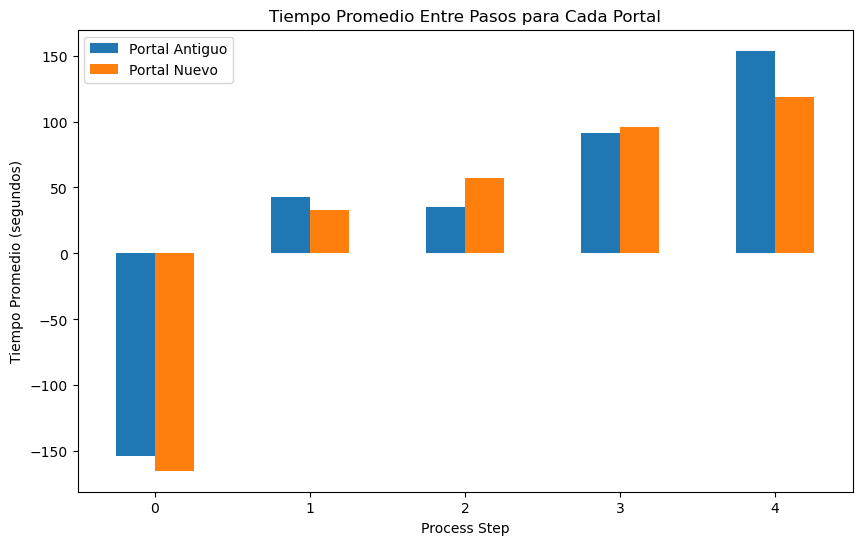

In [81]:
import matplotlib.pyplot as plt
# Asegurarnos que 'date_time' esté en formato datetime
df_all['date_time'] = pd.to_datetime(df_all['date_time'])

# Ordenar las filas por 'client_id', 'visit_id' y 'process_step'
df_sorted = df_all.sort_values(by=['client_id', 'visit_id', 'process_step'])

# Calcular el tiempo entre pasos para cada visita
df_sorted['time_diff'] = df_sorted.groupby(['client_id', 'visit_id'])['date_time'].diff()

# Filtrar los datos por portales
df_antiguo = df_sorted[df_sorted['variation'] == 0]
df_nuevo = df_sorted[df_sorted['variation'] == 1]

# Calcular el tiempo promedio entre pasos para cada portal
avg_time_diff_antiguo = df_antiguo.groupby('process_step')['time_diff'].mean()
avg_time_diff_nuevo = df_nuevo.groupby('process_step')['time_diff'].mean()

# Crear un DataFrame para las comparaciones
df_avg_time_diff = pd.DataFrame({
    'Portal Antiguo': avg_time_diff_antiguo.dt.total_seconds(),
    'Portal Nuevo': avg_time_diff_nuevo.dt.total_seconds()
})

# Gráfico de barras
df_avg_time_diff.plot(kind='bar', figsize=(10, 6))
plt.title('Tiempo Promedio Entre Pasos para Cada Portal')
plt.xlabel('Process Step')
plt.ylabel('Tiempo Promedio (segundos)')
plt.xticks(rotation=0)
plt.show()
#Este gráfico te permitirá visualizar el tiempo promedio que toma pasar de un paso a otro en el proceso para ambos portales.

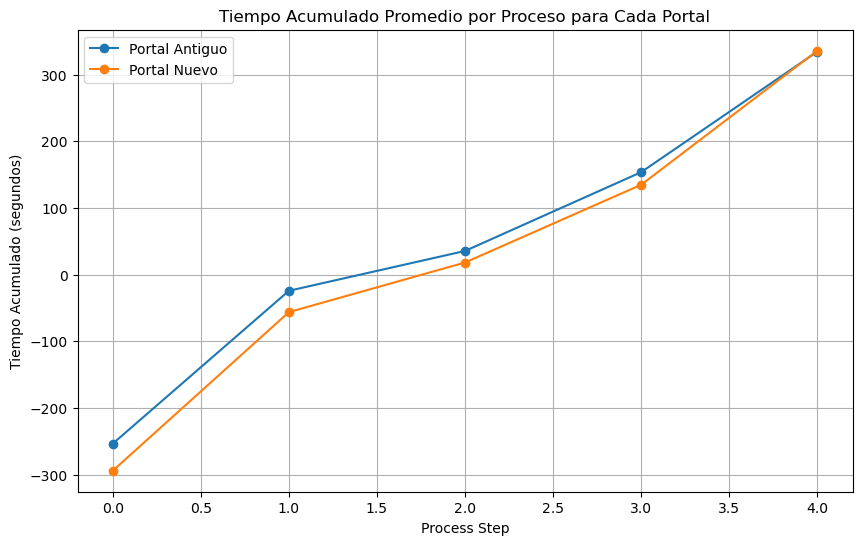

In [82]:
# Calcular el tiempo acumulado por visita y por paso
df_sorted['time_accumulated'] = df_sorted.groupby(['client_id', 'visit_id'])['time_diff'].cumsum()

# Filtrar nuevamente por portales
df_antiguo_accum = df_sorted[df_sorted['variation'] == 0]
df_nuevo_accum = df_sorted[df_sorted['variation'] == 1]

# Calcular el tiempo acumulado promedio por cada paso
acc_time_antiguo = df_antiguo_accum.groupby('process_step')['time_accumulated'].mean()
acc_time_nuevo = df_nuevo_accum.groupby('process_step')['time_accumulated'].mean()

# Crear un DataFrame para las comparaciones
df_acc_time = pd.DataFrame({
    'Portal Antiguo': acc_time_antiguo.dt.total_seconds(),
    'Portal Nuevo': acc_time_nuevo.dt.total_seconds()
})

# Gráfico de líneas
df_acc_time.plot(kind='line', figsize=(10, 6), marker='o')
plt.title('Tiempo Acumulado Promedio por Proceso para Cada Portal')
plt.xlabel('Process Step')
plt.ylabel('Tiempo Acumulado (segundos)')
plt.grid(True)
plt.show()
# Este gráfico te permitirá observar cómo el tiempo acumulado en cada paso difiere entre el portal antiguo y el nuevo.